In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py    

In [50]:
# data = np.load("data_result1.npz",allow_pickle=True)
print(data.files)
print(data['error'])

['error', 'state']
{'mses': [980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 980146.0351238513, 98

In [2]:
data = np.load("data_result.npz",allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])
state=data['state'][()]
print(type(state))


<class 'dict'>


In [3]:
state['hjbest']
h=state['hjbest'][:64]
j=state['hjbest'][64:]

(array([ 1.,  2.,  5.,  4., 11., 18., 11.,  6.,  5.,  1.]),
 array([-0.04404698, -0.03665739, -0.02926781, -0.02187822, -0.01448863,
        -0.00709905,  0.00029054,  0.00768013,  0.01506971,  0.0224593 ,
         0.02984889]),
 <BarContainer object of 10 artists>)

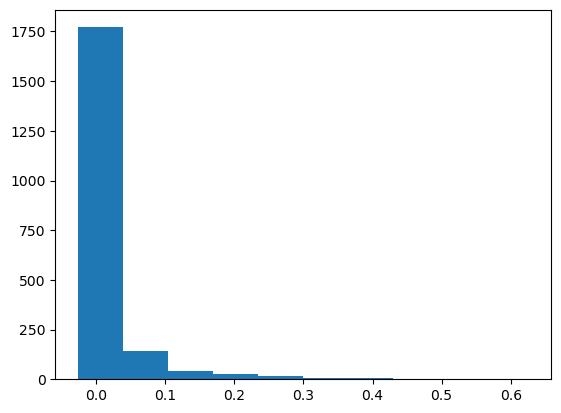

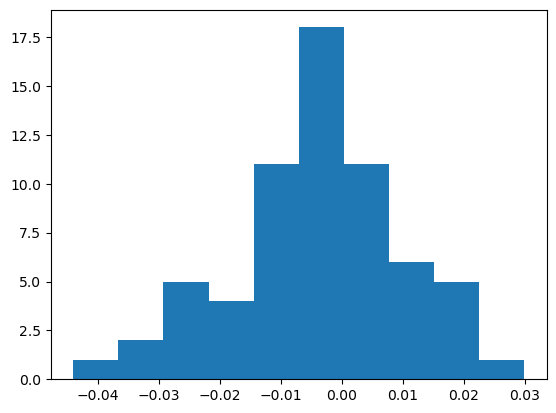

In [19]:
plt.hist(j)
plt.figure()
plt.hist(h)

In [4]:
filename='input_file.h5'

with h5py.File(filename, "w") as f:
    # f.create_dataset('h',data=h)
    # f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j


In [5]:
filename='output.h5'
with h5py.File(filename, "r") as f:
    # f.create_dataset('h',data=h)
    # f.create_dataset('j',data=j)
    print(list(f['result1']['aC']))

[76.0, 70.0, -30.0, 104.0, 44.0, 90.0, 22.0, 46.0, 28.0, 14.0, 68.0, 8.0, 42.0, -48.0, -14.0, 64.0, -4.0, 182.0, 60.0, 46.0, 28.0, 96.0, 64.0, 78.0, 180.0, 86.0, 72.0, 68.0, 74.0, 26.0, 44.0, 70.0, 280.0, -2.0, 70.0, 54.0, 30.0, -34.0, 24.0, 30.0, -8.0, 114.0, 34.0, 10.0, 20.0, 34.0, 26.0, 104.0, 134.0, 20.0, 2.0, 114.0, 226.0, 60.0, 104.0, 4.0, 40.0, 30.0, -36.0, -50.0, 128.0, 16.0, 60.0, -22.0, 70.0, 70.0, -2.0, 42.0, 12.0, 22.0, 24.0, -2.0, -38.0, 2.0, 52.0, 36.0, -16.0, -2.0, 4.0, 8.0, 14.0, 24.0, -10.0, 172.0, 8.0, -4.0, -6.0, 110.0, 10.0, 188.0, 18.0, 54.0, 54.0, 60.0, -38.0, -28.0, 58.0, 50.0, 30.0, 20.0, 32.0, 88.0, 146.0, -8.0, 34.0, 92.0, 12.0, 2.0, 4.0, -54.0, 48.0, 4.0, 20.0, -14.0, 90.0, 18.0, 48.0, 46.0, 28.0, 34.0, 8.0, 44.0, -18.0, 20.0, -2.0, 64.0, -40.0, 48.0, -6.0, 70.0, -54.0, 12.0, 66.0, 16.0, -50.0, 220.0, -4.0, 20.0, -30.0, 40.0, 46.0, 0.0, 24.0, 32.0, 70.0, -14.0, 22.0, 28.0, 62.0, -8.0, -2.0, 8.0, -16.0, -14.0, 50.0, 16.0, -18.0, 8.0, 70.0, 22.0, -26.0, -16.0, 

In [14]:
# betas=np.linspace(0.1,2,20)
# print(betas)
betas = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
cvs=[]
for beta in betas:
    print(f'output-{beta}.h5')
    with h5py.File(f'output-{beta}.h5', "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        cv=E*E-E2
        # print(list(f['result1']['aC']))
        cvs.append(E)


output-0.1.h5
output-0.2.h5
output-0.3.h5
output-0.4.h5
output-0.5.h5
output-0.6.h5
output-0.7.h5
output-0.8.h5
output-0.9.h5
output-1.h5
output-1.1.h5
output-1.2.h5
output-1.3.h5
output-1.4.h5
output-1.5.h5
output-1.6.h5
output-1.7.h5
output-1.8.h5
output-1.9.h5
output-2.h5


Text(0, 0.5, 'Cv')

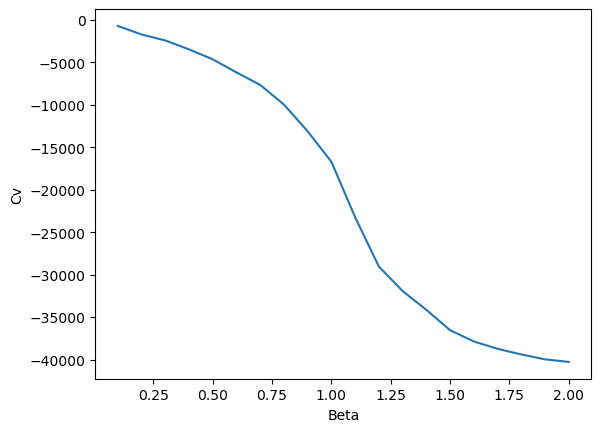

In [16]:
plt.plot(betas,cvs)
plt.xlabel('Beta')
plt.ylabel('Cv')



In [39]:
print(state[()])

print(np.ndim(state))
print(state.item())

{'hj': array([ -63327.58333333,   34920.75      , -119500.        , ...,
        198953.        ,  216039.66666666,  263882.33333334]), 'niter': 1024, 'lr': 0.10416666666666667, 'last_grad': array([ -593.,   327., -1119., ...,  1863.,  2023.,  2471.]), 'last_norm': 97005.76197319415, 'mc_ref': array([ -594.,   326., -1120., ...,  1864.,  2024.,  2472.]), 'hjbest': array([ -63265.8125,   34886.6875, -119383.4375, ...,  198758.9375,
        215828.9375,  263624.9375])}
0
{'hj': array([ -63327.58333333,   34920.75      , -119500.        , ...,
        198953.        ,  216039.66666666,  263882.33333334]), 'niter': 1024, 'lr': 0.10416666666666667, 'last_grad': array([ -593.,   327., -1119., ...,  1863.,  2023.,  2471.]), 'last_norm': 97005.76197319415, 'mc_ref': array([ -594.,   326., -1120., ...,  1864.,  2024.,  2472.]), 'hjbest': array([ -63265.8125,   34886.6875, -119383.4375, ...,  198758.9375,
        215828.9375,  263624.9375])}


In [13]:
filename = "mag_corre_file.h5"
# f1 = h5py.File(filename,'r+')  
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    print(f['aC'].shape)
    print(f['mag'].shape)
    # print(max(f['C'][:]))
    # index = f['C'][:].argmax()
    # print(index)
    # print(f['T'][index])
    # print(f['T'][:])

Keys: <KeysViewHDF5 ['aC', 'mag', 'result1']>
(2016,)
(64,)


In [81]:
print(cvs[:])

[<Closed HDF5 dataset>, <Closed HDF5 dataset>, <Closed HDF5 dataset>, <Closed HDF5 dataset>]
